# Identify users who are presumabely sheltering-in-place
If they are tweeting from Zone A during landfall, then we want to know if we can clearly tell that they have chosen to shelter-in-place.

In [1]:
import pandas as pd; import numpy as np; from multiprocessing import Pool, Manager; import numpy as np; import geopandas as gpd
import matplotlib.pyplot as plt; import seaborn as sns
import matplotlib, os, json, sys, time, datetime
%matplotlib inline

## Import the Zone A Geometry

In [2]:
import fiona, shapely; from osgeo import ogr; from shapely.geometry import mapping, shape
c = fiona.open('../ZoneA_Geometry/ZoneA/OGRGeoJSON.shp','r')
pol = c.next(); zoneA = shape(pol['geometry']).buffer(0); zoneA.is_valid

True

## Read in our Geo-Vulnerable Users

In [3]:
user_names = sorted(os.listdir('../working_data/geovulnerable_users/'))
len(user_names)

118

In [4]:
#Define the working data directory... 
def loader_function(args):
    uFile, q = args
    u = json.load(open("../working_data/geovulnerable_users/"+uFile,'r'))
    tweets = []
    for t in u['features']:
        t['properties']['geometry'] = shape(t['geometry'])
        t['properties']['date'] = datetime.datetime.fromtimestamp(t['properties']['date']['$date']/1000)
        tweets.append(t['properties'])
    q.put(1)
    return gpd.GeoDataFrame(tweets)

In [5]:
#Parallel runtime
p = Pool(30)
m = Manager()
q = m.Queue()

args = [(i, q) for i in user_names]
result = p.map_async(loader_function, args)

# monitor loop
while True:
    if result.ready():
        break
    else:
        size = q.qsize()
        with open("load.log",'w') as log:
            log.write("\rProcessed: {0}, {1:.3g}%\n".format(size, size/len(args)*100))
        sys.stderr.write("\rProcessed: {0}, {1:.3g}%".format(size, size/len(args)*100))
        time.sleep(0.5)

users = result.get()

Processed: 118, 100%

In [6]:
users.sort(key=lambda x: len(x),reverse=True)

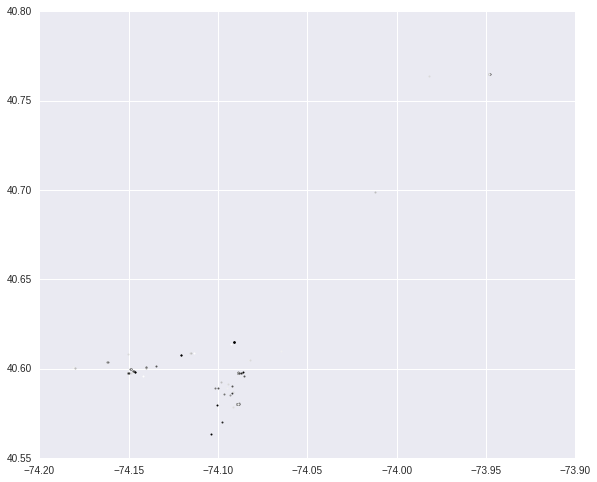

In [7]:
users[25].plot(figsize=(15,8))

In [8]:
_landfall = '201210300000'
_start    = '201210290000'
_end      = '201211010000'

In [9]:
def insideZoneA(p):
    if p==None:
        return False
    else:
        return p.within(zoneA)

## Find tweets DURING the storm IN ZoneA

In [10]:
for u in users[:10]:
    print(u.user[0])
    print("-------------")
    print("Tweets: {0}".format(len(u)))
    landfall_tweets = u.query('date > {0} and date < {1}'.format(_landfall,_end))
    print("During Storm: {0}".format(len(landfall_tweets)))
    zoneATweets = landfall_tweets.geometry.apply(lambda p: p.within(zoneA))
    print(zoneATweets)
    print("=============\n")

NZavaa
-------------
Tweets: 3462
During Storm: 110
2739    False
2740     True
2741     True
2742     True
2743    False
2744     True
2745     True
2746    False
2747    False
2748    False
2749     True
2750    False
2751    False
2752    False
2753    False
2754    False
2755     True
2756    False
2757     True
2758     True
2759     True
2760     True
2761     True
2762     True
2763    False
2764    False
2765    False
2766     True
2767     True
2768     True
        ...  
2819    False
2820     True
2821     True
2822    False
2823    False
2824     True
2825     True
2826     True
2827     True
2828     True
2829    False
2830     True
2831    False
2832    False
2833    False
2834     True
2835     True
2836    False
2837    False
2838     True
2839    False
2840     True
2841    False
2842     True
2843     True
2844    False
2845     True
2846     True
2847    False
2848    False
Name: geometry, dtype: bool

_an_oak_tree_
-------------
Tweets: 2573
During Storm: 15
2101   

In [13]:
cnt = 0
for u in users:
    print(u.user[0])
    print("-------------")
    print("Tweets: {0}".format(len(u)))
    landfall_tweets = u.query('date > {0} and date < {1}'.format(_landfall,_end))
    print("During Storm: {0}".format(len(landfall_tweets)))
    zoneATweets = landfall_tweets.geometry.apply(lambda p: p.within(zoneA))
#     print(zoneATweets)
    if zoneATweets.all()==True and len(zoneATweets)>0:
        print(landfall_tweets[['text','date']].to_csv())
        cnt+=1
    print("=============\n")

NZavaa
-------------
Tweets: 3462
During Storm: 110

_an_oak_tree_
-------------
Tweets: 2573
During Storm: 15

MyLuvisKING
-------------
Tweets: 1718
During Storm: 160

brianaaanicolee
-------------
Tweets: 1495
During Storm: 73

objorionto
-------------
Tweets: 1317
During Storm: 20

sfloridia98
-------------
Tweets: 1212
During Storm: 11

Explicit_CLUTCH
-------------
Tweets: 1209
During Storm: 0

carminenyc
-------------
Tweets: 1034
During Storm: 33

dem_CALLmi_tutu
-------------
Tweets: 900
During Storm: 0

RollingStoned40
-------------
Tweets: 481
During Storm: 0

CHINKEYEYEZ3
-------------
Tweets: 471
During Storm: 2

MikeViktorenko
-------------
Tweets: 393
During Storm: 4
,text,date
176,"If nobody told you that they love you today yet, I want you to know that I do #feelbettertweets",2012-10-31 22:00:44
177,Time to start growing my half ass barely pubescent novembeard #sideburnsallday,2012-10-31 22:18:32
178,@VivianManders oh damn thats sexy,2012-10-31 22:19:41
179,Nigga fuck 

In [12]:
cnt = 0
for u in users:
    print(u.user[0])
    print("-------------")
    print("Tweets: {0}".format(len(u)))
    landfall_tweets = u.query('date > {0} and date < {1}'.format(_landfall,_end))
    print("During Storm: {0}".format(len(landfall_tweets)))
    zoneATweets = landfall_tweets.geometry.apply(lambda p: p.within(zoneA))
#     print(zoneATweets)
    if zoneATweets.all()==False and len(zoneATweets)>0:
        print(landfall_tweets[['text','date']].to_csv())
        cnt+=1
    print("=============\n")

NZavaa
-------------
Tweets: 3462
During Storm: 110
,text,date
2739,I wanna fuckin leave my house already man jeeez,2012-10-30 08:22:06
2740,Anyone tryna seend me naked pictures?,2012-10-30 08:26:03
2741,"@Biordiiii i want to, my fuckin mom is telling me as soon as i leave the storm will come back and kill me.......shes shot",2012-10-30 08:27:48
2742,"@GabBordenca damn, ur mad cool",2012-10-30 08:28:30
2743,@GabBordenca @Biordiiii frank she cant hang,2012-10-30 08:35:22
2744,@TheHomelesspimp BOYYYYYYYY,2012-10-30 09:19:45
2745,@valtheofanis i still think we shuld party,2012-10-30 10:03:12
2746,@RyanPaccione all of em are literally right near your house and deep in flushing,2012-10-30 10:03:58
2747,"@mandabeann do not be sorry, i requested her.....shes a saint",2012-10-30 10:05:00
2748,@TheHomelesspimp dude i cnt be couped in this house nymore man,2012-10-30 10:05:34
2749,"@valtheofanis im down......u bring the cubs, ill bring the inflatables. You already know what time were meeting",20

In [13]:
cnt

54

## Top Users from this filter

1. ReadyRock7


# Exploring those who DEFINITIVELY sheltered-in-place
This is more about _precision_ than _recall_, as the thresholds are very strict right now.

In [14]:
sip_users = []

In [15]:
for u in users:
    zoneATweets = landfall_tweets.geometry.apply(lambda p: p.within(zoneA))
    landfall_tweets = u.query('date > {0} and date < {1}'.format(_landfall,_end))
    if zoneATweets.all()==True and len(zoneATweets)>0:
        print(u.user[0])
        print("-------------")
        print("Tweets: {0}".format(len(u)))
        print("During Storm: {0}".format(len(landfall_tweets)))
        print(landfall_tweets[['text','date']].to_csv())
        print("=============\n")
        sip_users.append(u.copy())

Trimarchi023
-------------
Tweets: 376
During Storm: 3
,text,date
145,Plans for tomorrow hmu need outta my house,2012-10-31 22:58:16
146,@MikeTheCake ur a great fucking person,2012-10-31 23:27:29
147,@Ryann_Langannn someone had a bad day !,2012-10-31 23:43:13


Sarahphara_TW
-------------
Tweets: 361
During Storm: 0
,text,date


Lauren_Morra
-------------
Tweets: 329
During Storm: 8
,text,date
294,@cosmeticaffair lol! I got cabin fever found an open target and went craxy,2012-10-30 14:30:21
295,@Kiss_N_Fly epic night last week with @djstoon playing along side @pauloakenfold house of horror http://t.co/FJmakk3x,2012-10-30 18:00:18
296,HALLOWEEN,2012-10-31 09:55:41
297,A hot shower would be like Christmas morning right now #sandyproblems,2012-10-31 11:30:03
298,@NicholasGrava ..... Your comin home ???,2012-10-31 13:51:48
299,@gabrielanor I feel ya kourt #girly_problems,2012-10-31 14:35:26
300,@gabrielanor kardash love 💜💜,2012-10-31 14:45:27
301,So I can't even go into my house and get cl

In [16]:
len(sip_users)

19

In [17]:
x = sip_users[0]

In [18]:
from bson import json_util

In [20]:
#Write GeoJSON files for all of the users
for u in sip_users:
    file = name = u['user'][0].lower()
    g = u[['geometry','text','user','date']].copy()
    first_date = g['date'][0]
    last_date  = g['date'][len(g)-1]
    g['time'] = g['date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%dT%H:%M:%SZ'))
    g['h']    = g['date'].apply(lambda x: int((x - first_date).total_seconds()/3600))
    g['m']    = g['date'].apply(lambda x: int((x - first_date).total_seconds()/60))
    with open("/data/www/jennings/geovulnerable/sip/"+file+".geojson",'w') as oFile:
        oFile.write(g.to_json(default=json_util.default))
    start = "{0}-{1}-{2}T{3}:{4}".format(first_date.year,first_date.month,first_date.day,first_date.hour,first_date.minute)
    end   = last_date.date()
    print(file)
    print("http://www.townsendjennings.com/geojson-tweets?geojson=http://epic-analytics.cs.colorado.edu:9000/jennings/geovulnerable/sip/{0}.geojson&start={1}&end={2}".format(file, start, end))
    print(" ")

trimarchi023
http://www.townsendjennings.com/geojson-tweets?geojson=http://epic-analytics.cs.colorado.edu:9000/jennings/geovulnerable/sip/trimarchi023.geojson&start=2012-10-18T20:18&end=2012-11-28
 
sarahphara_tw
http://www.townsendjennings.com/geojson-tweets?geojson=http://epic-analytics.cs.colorado.edu:9000/jennings/geovulnerable/sip/sarahphara_tw.geojson&start=2012-9-1T18:41&end=2012-11-29
 
lauren_morra
http://www.townsendjennings.com/geojson-tweets?geojson=http://epic-analytics.cs.colorado.edu:9000/jennings/geovulnerable/sip/lauren_morra.geojson&start=2012-9-2T19:2&end=2012-11-10
 
shes_ayee_shmut
http://www.townsendjennings.com/geojson-tweets?geojson=http://epic-analytics.cs.colorado.edu:9000/jennings/geovulnerable/sip/shes_ayee_shmut.geojson&start=2012-9-1T14:37&end=2012-11-29
 
squish108
http://www.townsendjennings.com/geojson-tweets?geojson=http://epic-analytics.cs.colorado.edu:9000/jennings/geovulnerable/sip/squish108.geojson&start=2012-9-2T10:32&end=2012-11-29
 
onicadiana
h

In [21]:
u

,cluster,coords,date,day_cluster,geo_delta,geometry,speed,text,time_delta,user
0,1,"[-74.00755823, 40.70529536]",2012-09-06 23:52:41,1,NaN,POINT (-74.00755823 40.70529536),NaN,@antoniawebb I am on it! Just landed in NY.. C...,NaN,GeorgiaAFowler
1,1,"[-74.00759629, 40.70510931]",2012-09-06 23:54:22,1,20.935102,POINT (-74.00759629 40.70510931),0.207278,"XX-Angels, new fav moping song",101.0,GeorgiaAFowler
2,1,"[-74.00752774, 40.70530989]",2012-09-18 07:01:31,3,23.039848,POINT (-74.00752774 40.70530989),0.000024,Need a real coffee sometime soon @thedownlowe ...,976029.0,GeorgiaAFowler
3,1,"[-74.00758212, 40.70523176]",2012-09-21 21:48:40,6,9.822813,POINT (-74.00758212 40.70523176),0.000031,When your so overtired your nauseous yet still...,312429.0,GeorgiaAFowler
4,1,"[-74.00765195, 40.70521736]",2012-09-21 21:52:26,6,6.100153,POINT (-74.00765195 40.70521736),0.026992,@thedownlowe tommorow #goodcoffee,226.0,GeorgiaAFowler
5,-1,"[-74.00888443, 40.74551752]",2012-09-24 08:46:58,3,4482.376738,POINT (-74.00888442999999 40.74551752),0.021136,Shooting #H&amp;M with my fav team @hm @ Pi...,212072.0,GeorgiaAFowler
6,-1,"[-73.9891179, 40.76027623]",2012-10-03 20:32:59,6,2337.828211,POINT (-73.9891179 40.76027623),0.002851,Just saw a theatre starring the babe #JakeGyle...,819961.0,GeorgiaAFowler
7,1,"[-74.00758006, 40.70529734]",2012-10-09 16:50:29,5,6308.188997,POINT (-74.00758006 40.70529734),0.012490,Happy birthday #johnlennon,505050.0,GeorgiaAFowler
8,-1,"[-73.98565727, 40.6895699]",2012-10-19 17:34:28,5,2544.425676,POINT (-73.98565727 40.6895699),0.002936,#love # euphoria #brooklyn @ 75 Hoyt - Greene...,866639.0,GeorgiaAFowler
9,-1,"[-74.00634849, 40.72199436]",2012-10-29 16:09:07,5,4005.142139,POINT (-74.00634848999999 40.72199436),0.004663,A Table just flew past my fifth floor window #...,858879.0,GeorgiaAFowler


In [23]:
for idx,u in sip_users[0].iterrows():
    print(u['date'],u['text'])

2012-10-18 20:18:11 When @nicoleyohrlingg doesnt answer my texts I become sad :(
2012-10-18 20:22:38 @nicoleyohrlingg thankyou😃
2012-10-18 20:27:57 @meganlynnduff birth
2012-10-18 20:34:24 When she ignores u &lt;/3
2012-10-18 21:06:59 I fuckin hate u so much
2012-10-18 21:11:37 @nicoleyohrlingg I think ur gonna fail..h
Js
2012-10-18 21:20:08 #fml
2012-10-18 21:32:25 Gotta love ur close  friends and family in the end they are all ya got
2012-10-18 21:36:25 @TebowTimeRob I love them
2012-10-18 21:38:45 @TebowTimeRob bomfire tomorro
2012-10-18 21:50:07 I called @nicoleyohrlingg 4k tweet #special
2012-10-18 21:52:25 @TebowTimeRob @nicoleyohrlingg we have time ! Tell us!..lol sorry I'm butting it
2012-10-18 21:54:14 Hate potheads but love @TebowTimeRob
2012-10-18 21:54:31 Who wants the 122 tweet ;)
2012-10-18 21:56:50 122 tweet = @TebowTimeRob for being a craxhhead
2012-10-18 22:06:25 @TebowTimeRob now ppl are gonna wonder what it is
2012-10-18 22:06:54 @Trimarchi023 @tebowtimerob @nicoleyo

AttributeError: 'GeoDataFrame' object has no attribute 'name'